# PET simulation analysis

Analysis after the simulation :
- in folder: pet/
- macro: main.mac


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.interpolate import griddata
from matplotlib import collections  as mc
import numpy as np
from ipywidgets import interact
import os
from pathlib import Path
import uproot
import pandas as pd

In [2]:
# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)
folder = Path('/Users/cmwever73/Desktop/nbdata/root_files')
if (not folder.is_dir()):
    print('ERROR: {} is not a folder.'.format(folder))
filename = os.path.join(folder, 'RDGsetup_biased_resAng.root')
f = uproot.open(filename)

The Current Working Directory (CWD) is: 
 /Users/cmwever73/Desktop/nbdata/Notebooks


In [3]:
print("List of keys: \n", f.keys())

List of keys: 
 [b'Singles;224', b'Singles;223', b'latest_event_ID;1', b'total_nb_primaries;1', b'Hits;1', b'OpticalData;1', b'Coincidences;1']


In [4]:
singles = f[b'Singles']
print('Number of Singles :', len(singles))
print('Singles: ')
for i in singles.keys():
    print(i, ' ', end='')

Number of Singles : 223352
Singles: 
b'runID'  b'eventID'  b'sourceID'  b'sourcePosX'  b'sourcePosY'  b'sourcePosZ'  b'time'  b'energy'  b'globalPosX'  b'globalPosY'  b'globalPosZ'  b'gantryID'  b'blockID'  b'crystalID'  b'unused3ID'  b'unused4ID'  b'unused5ID'  b'comptonPhantom'  b'comptonCrystal'  b'RayleighPhantom'  b'RayleighCrystal'  b'axialPos'  b'rotationAngle'  b'comptVolName'  b'RayleighVolName'  

In [5]:
time = singles.arrays()[b'time'] 
energy = singles.arrays()[b'energy']
crystalID = singles.arrays()[b'crystalID']
#each crystal has an ID there would 4608 of them total (48x48x2), 2304 per crystal 
x = singles.arrays()[b'globalPosX']
y = singles.arrays()[b'globalPosY']
z = singles.arrays()[b'globalPosZ']

crystalarr1 = np.column_stack((x,y,z,crystalID,energy,time))
crystalarr1[:,4] *= 1000
crystalarr = crystalarr1[np.where((crystalarr1[:,4] > 100))[0]]
singA = crystalarr[np.where((crystalarr[:, 0] < 0.000))[0]]
#This is here, if you want to save information in a txt file
#np.savetxt('singA.txt', singA)
#print(len(singA))

singB = crystalarr[np.where((crystalarr[:, 0] > 0.000))[0]]
#np.savetxt('singB.txt', singB)
#print(len(singB))

# Energy Deposition of Simulated Data

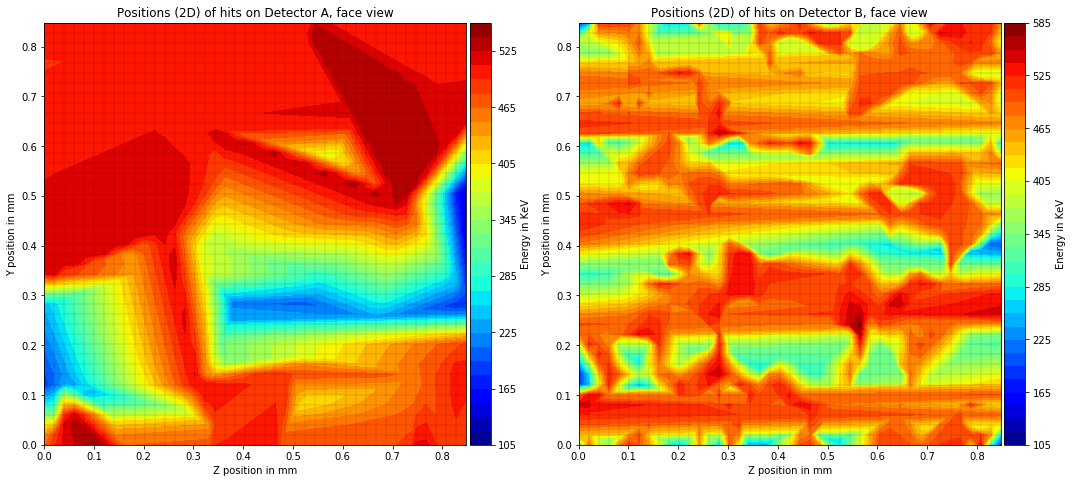

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
leng = 161007
fig, ax = plt.subplots(1,2, figsize=(15, 15))
#singA = np.loadtxt(fname = "singA.txt", dtype = 'float')
xA = singA[:leng, 0]
yA = singA[:leng, 1]
zA = singA[:leng, 2]
dA = singA[:leng, 4]
yminA = min(singA[:leng, 1])
ymaxA = max(singA[:leng, 1])
zminA = min(singA[:leng, 2])
zmaxA = max(singA[:leng, 2])
    
#singB = np.loadtxt(fname = "singB.txt", dtype = 'float')
xB = singB[:leng, 0]
yB = singB[:leng, 1]
zB = singB[:leng, 2]
dB = singB[:leng, 4]
yminB = min(singB[:leng, 1])
ymaxB = max(singB[:leng, 1])
zminB = min(singB[:leng, 2])
zmaxB = max(singB[:leng, 2])

#zi, yi = np.meshgrid(np.linspace(-0.4625, 0.4625, 48), np.linspace(-0.4625, 0.4625, 48))
ziRdg, yiRdg = np.meshgrid(np.linspace(0, 0.84792, 43), np.linspace(0, 0.84792, 43))
Z,Y = np.meshgrid(ziRdg,yiRdg)

#Z,Y = np.meshgrid(zi,yi)
Z,Y = np.meshgrid(ziRdg,yiRdg)

diA = griddata((zA, yA), dA, (Z, Y))
diB = griddata((zB, yB), dB, (Z, Y))

posA = ax[0].contourf(Z, Y, diA, 30, cmap='jet')
ax[0].plot(ziRdg, yiRdg, 'k-', lw=0.3, alpha=0.4)
ax[0].plot(ziRdg.T, yiRdg.T, 'k-', lw=0.3, alpha=0.4)
ax[0].set_title('Positions (2D) of hits on Detector A, face view')
ax[0].set_xlabel('Z position in mm')
ax[0].set_ylabel('Y position in mm')
ax[0].set_aspect('equal')

divider = make_axes_locatable(ax[0])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
cbr = fig.colorbar(posA, cax=cax2)
cbr.ax.set_ylabel('Energy in KeV')
plt.tight_layout(h_pad=1)


posB = ax[1].contourf(Z, Y, diB, 30, cmap='jet')
ax[1].plot(ziRdg, yiRdg, 'k-', lw=0.3, alpha=0.4)
ax[1].plot(ziRdg.T, yiRdg.T, 'k-', lw=0.3, alpha=0.4)
ax[1].set_title('Positions (2D) of hits on Detector B, face view')
ax[1].set_xlabel('Z position in mm')
ax[1].set_ylabel('Y position in mm')
ax[1].set_aspect('equal')

divider = make_axes_locatable(ax[1])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
cbr = fig.colorbar(posB, cax=cax2)
cbr.ax.set_ylabel('Energy in KeV')
plt.tight_layout(h_pad=1)

#dims = 0.4625/48

#plt.savefig('../Plots/sing_energy1.png')

# Counts Per Crystal Simulated Data

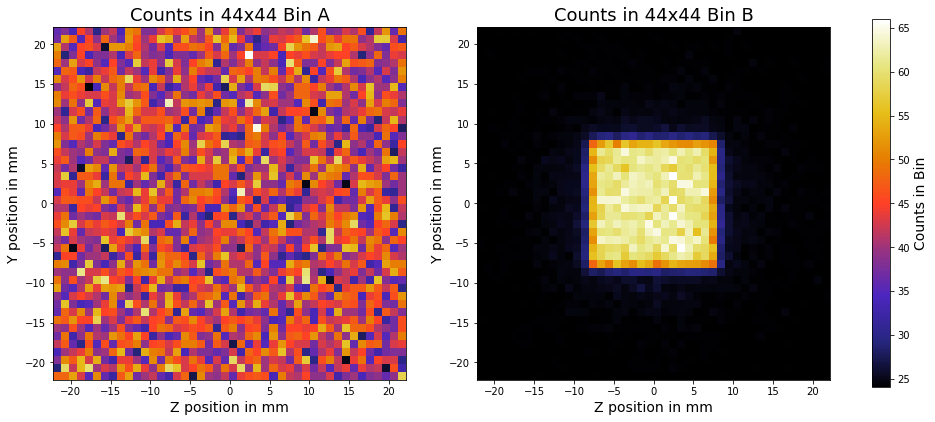

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15, 15))

h = ax[0].hist2d(-zA, yA, bins=44, cmap='CMRmap')
ax[0].set_title('Counts in 44x44 Bin A', fontsize=18)
ax[0].set_xlabel('Z position in mm', fontsize=14)
ax[0].set_ylabel('Y position in mm', fontsize=14)
ax[0].set_aspect('equal')

h1= ax[1].hist2d(zB, yB, bins=44, cmap='CMRmap')
ax[1].set_title('Counts in 44x44 Bin B', fontsize=18)
ax[1].set_xlabel('Z position in mm', fontsize=14)
ax[1].set_ylabel('Y position in mm', fontsize=14)
ax[1].set_aspect('equal')

cbar = plt.colorbar(h[3], ax=ax, fraction=.022)
cbar.ax.set_ylabel('Counts in Bin', fontsize=14)

plt.savefig('../Plots/singles_pos_allbaised_44.png')

# Counts in Annode Simulated Data

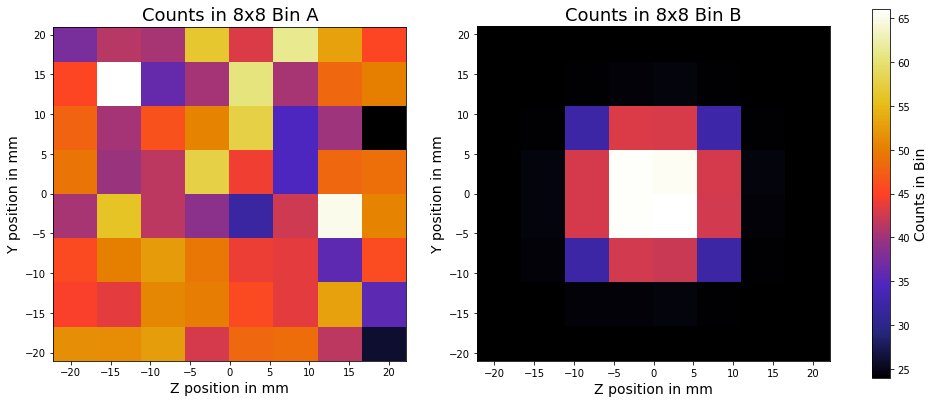

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15, 15))
h2 = ax[0].hist2d(-zA, yA, bins=8, cmap='CMRmap')
ax[0].set_title('Counts in 8x8 Bin A', fontsize=18)
ax[0].set_xlabel('Z position in mm', fontsize=14 )
ax[0].set_ylabel('Y position in mm', fontsize=14 )
ax[0].set_ylim(-21, 21)
ax[0].set_aspect('equal')

h3= ax[1].hist2d(zB, yB, bins=8, cmap='CMRmap')
ax[1].set_title('Counts in 8x8 Bin B', fontsize=18)
ax[1].set_xlabel('Z position in mm', fontsize=14 )
ax[1].set_ylabel('Y position in mm', fontsize=14 )
ax[1].set_ylim(-21, 21)
ax[1].set_aspect('equal')
cbar = plt.colorbar(h[3], ax=ax, fraction=.022)
cbar.ax.set_ylabel('Counts in Bin', fontsize=14 )

plt.savefig('../Plots/singles_pos_allbaised_anode.png')

In [12]:
#Read in RDG Excel Data
df = pd.read_excel (r'../rdg_data.xlsx')
aar = df[["x1", "y1", "e1", "time"]].to_numpy()
bar = df[["x2", "y2", "e2", "time"]].to_numpy()

# Energy Deposition RDG Data

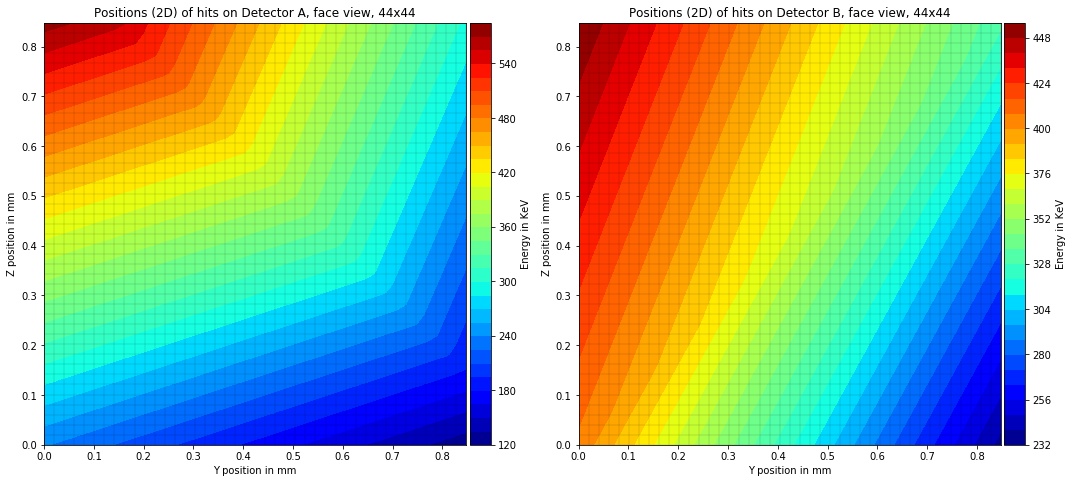

In [13]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
leng =  80504
fig, ax = plt.subplots(1,2, figsize=(15, 15))

xA = aar[:leng, 0]
yA = aar[:leng, 1]
depA = aar[:leng, 2]
yminA = min(aar[:leng, 0])
ymaxA = max(aar[:leng, 0])
zminA = min(aar[:leng, 1])
zmaxA = max(aar[:leng, 1])

xB = bar[:leng, 0]
yB = bar[:leng, 1]
depB = bar[:leng, 2]
yminB = min(bar[:leng, 0])
ymaxB = max(bar[:leng, 0])
zminB = min(bar[:leng, 1])
zmaxB = max(bar[:leng, 1])


# yi, zi = np.meshgrid(np.linspace(-0.42396, 0.42396, 48), np.linspace(-0.42396, 0.42396, 48))
xiRdg, yiRdg = np.meshgrid(np.linspace(0, 0.84792, 43), np.linspace(0, 0.84792, 43))
X,Y = np.meshgrid(xiRdg,yiRdg)

diA = griddata((xA, yA), depA, (X, Y))
diB = griddata((xB, yB), depB, (X, Y))

posA = ax[0].contourf(X, Y, diA, 30, cmap='jet')
ax[0].plot(xiRdg, yiRdg, 'k-', lw=0.3, alpha=0.4)
ax[0].plot(xiRdg.T, yiRdg.T, 'k-', lw=0.3, alpha=0.4)
ax[0].set_title('Positions (2D) of hits on Detector A, face view, 44x44')
ax[0].set_xlabel('Y position in mm')
ax[0].set_ylabel('Z position in mm')
ax[0].set_aspect('equal')

divider = make_axes_locatable(ax[0])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
cbr = fig.colorbar(posB, cax=cax2)
cbr.ax.set_ylabel('Energy in KeV')
plt.tight_layout(h_pad=1)

posB = ax[1].contourf(X, Y, diB, 30, cmap='jet')
ax[1].plot(xiRdg, yiRdg, 'k-', lw=0.3, alpha=0.4)
ax[1].plot(xiRdg.T, yiRdg.T, 'k-', lw=0.3, alpha=0.4)
ax[1].set_title('Positions (2D) of hits on Detector B, face view, 44x44')
ax[1].set_xlabel('Y position in mm')
ax[1].set_ylabel('Z position in mm')
ax[1].set_aspect('equal')

#cbr = fig.colorbar(posB, ax=ax)
#cbr.set_label('Energy in MeV', rotation=270)

divider = make_axes_locatable(ax[1])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
cbr = fig.colorbar(posB, cax=cax2)
cbr.ax.set_ylabel('Energy in KeV')
plt.tight_layout(h_pad=1)

plt.savefig('../Plots/energy_rdg_data.png')

# Counts in Crystal RDG Data

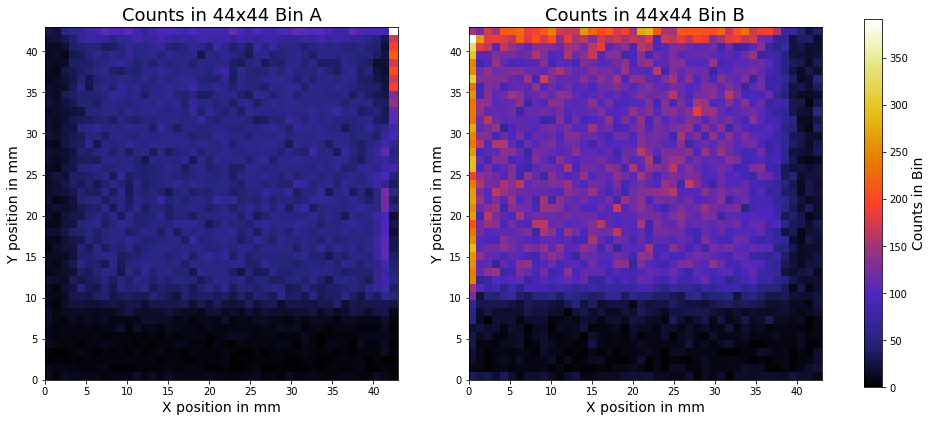

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15, 15))

h = ax[0].hist2d(xA, yA, bins=44, cmap='CMRmap')
ax[0].set_title('Counts in 44x44 Bin A', fontsize=18)
ax[0].set_xlabel('X position in mm', fontsize=14 )
ax[0].set_ylabel('Y position in mm', fontsize=14 )
ax[0].set_aspect('equal')

h1= ax[1].hist2d(xB, yB, bins=44, cmap='CMRmap')
ax[1].set_title('Counts in 44x44 Bin B', fontsize=18)
ax[1].set_xlabel('X position in mm', fontsize=14)
ax[1].set_ylabel('Y position in mm', fontsize=14)
ax[1].set_aspect('equal')

cbar = plt.colorbar(h[3], ax=ax, fraction=.022)
cbar.ax.set_ylabel('Counts in Bin', fontsize=14)

plt.savefig('../Plots/singles_pos_rdg_data_44.png')

# Counts in Anode RDG Data

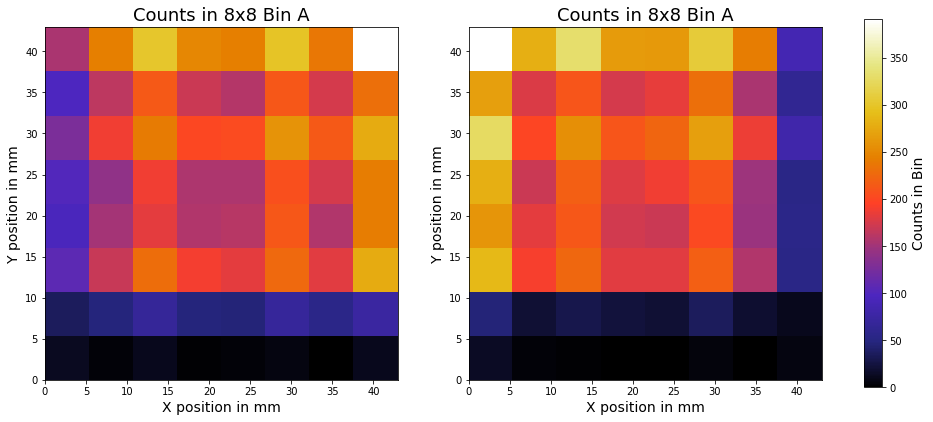

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15, 15))

h2 = ax[0].hist2d(xA, yA, bins=8, cmap='CMRmap')
ax[0].set_title('Counts in 8x8 Bin A', fontsize=18)
ax[0].set_xlabel('X position in mm', fontsize=14 )
ax[0].set_ylabel('Y position in mm', fontsize=14 )
ax[0].set_aspect('equal')


h3= ax[1].hist2d(xB, yB, bins=8, cmap='CMRmap')
ax[1].set_title('Counts in 8x8 Bin A', fontsize=18)
ax[1].set_xlabel('X position in mm', fontsize=14 )
ax[1].set_ylabel('Y position in mm', fontsize=14 )
ax[1].set_aspect('equal')

cbar = plt.colorbar(h[3], ax=ax, fraction=.022)
cbar.ax.set_ylabel('Counts in Bin', fontsize=14)

plt.savefig('../Plots/singles_pos_rdg_data_anode.png')

# Energy Spectrum Graph Simulated Data

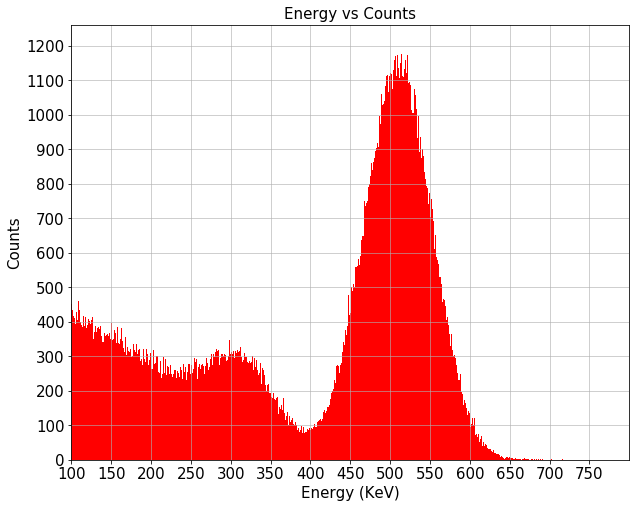

In [48]:
#All my simulated Data
crystalarr2 = np.column_stack((x,y,z,crystalID,energy,time))
crystalarr2[:,4] *= 1000
plt.figure(figsize=[10,8])
plt.hist(crystalarr2[:,4], bins = 1000,  color='r', linewidth=1) 
plt.title("Energy vs Counts",fontsize=15 ) 
plt.yticks(np.arange(0, 1300, step=100)) 
plt.xticks(np.arange(100, 800, step=50)) 
plt.xlim(100, 800)
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
#plt.yscale('log')
plt.xlabel('Energy (KeV)',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('../Plots/EvsCounts_all.png')
plt.show()

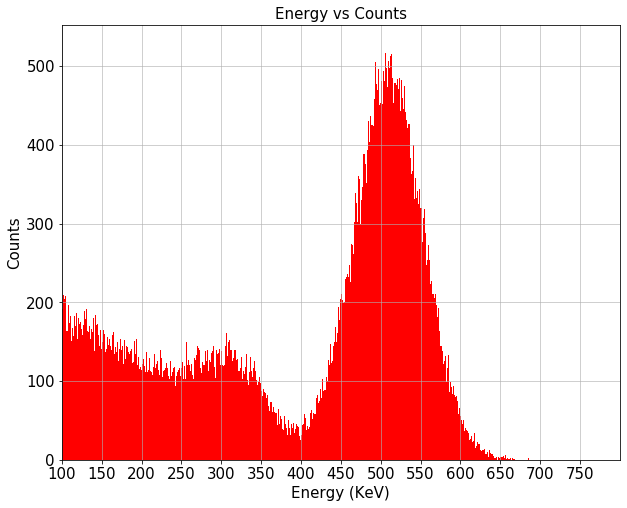

In [37]:
#only as many counts as RDG
crystalarr2 = np.column_stack((x[:161007],y[:161007],z[:161007],crystalID[:161007],energy[:161007],time[:161007]))
crystalarr2[:,4] *= 1000
plt.figure(figsize=[10,8])
plt.hist(crystalarr2[:,4], bins = 1000,  color='r', linewidth=1) 
plt.title("Energy vs Counts",fontsize=15 ) 
plt.yticks(np.arange(0, 600, step=100)) 
plt.xticks(np.arange(100, 800, step=50)) 
plt.xlim(100, 800)
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
#plt.yscale('log')
plt.xlabel('Energy (KeV)',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('../Plots/EvsCounts_matchRDGcount.png')
plt.show()

# Energy Spectrum Graph RDG Dada

[[ 27  14 547   0]
 [ 21  39 359   0]
 [ 16  20 538   0]
 ...
 [  0   5 122  60]
 [ 27  12 168  60]
 [  0  12 486  60]]
[547 359 538 ... 122 168 486]


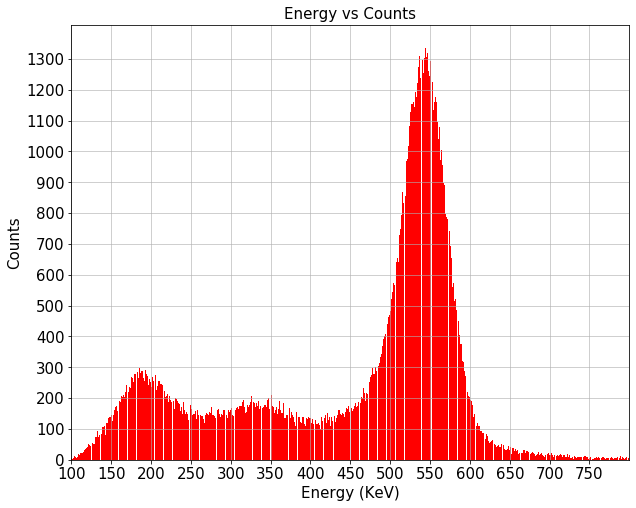

In [17]:
totstack = np.vstack((aar,bar))
print(totstack)
totE = totstack[:,2]
print(totE)
# totEar = totEar1[np.where((totEar1[:,2] > 100))[0]]
plt.figure(figsize=[10,8])
plt.hist(totE, bins = 1000,  color='r', linewidth=1) 
plt.title("Energy vs Counts",fontsize=15 ) 
plt.yticks(np.arange(0, 1400, step=100)) 
plt.xticks(np.arange(100, 800, step=50)) 
plt.xlim(100, 800)
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
#plt.yscale('log')
plt.xlabel('Energy (KeV)',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('../Plots/EvsCounts_rdg.png')
plt.show()

# Calculate FWHM of RDG Data

In [36]:
totEar = totE[np.where((totE > 400) & (totE < 625))[0]]
dfa = pd.DataFrame(data=totEar,columns=["energy"])
print(dfa.mean())
dfcounts = dfa['energy'].value_counts()
print('STD_RDG:', dfa.std(axis = 0))
sigma = dfa.std(axis = 0)
fwhm = 2.35*sigma
print('FWHM_RDG:', fwhm)

energy    531.128843
dtype: float64
STD_RDG: energy    42.412523
dtype: float64
FWHM_RDG: energy    99.66943
dtype: float64


# Calculate FWHM of Simulated Data

In [57]:
#All simulated Events
mydata = np.column_stack((energy)).T
mydata1 = mydata*1000
mydata2 = mydata1[np.where((mydata1 > 400) & (mydata1< 625))[0]]
dfb = pd.DataFrame(data=mydata2,columns=["energy"])
print(dfb.mean())
dfcounts = dfb['energy'].value_counts()
print('STD_RDG:', dfb.std(axis = 0))
sigma = dfb.std(axis = 0)
fwhm = 2.35*sigma
print('FWHM_RDG:', fwhm)

energy    509.335419
dtype: float32
STD_RDG: energy    42.594486
dtype: float32
FWHM_RDG: energy    100.097038
dtype: float32


In [50]:
#Only first 161007 events
mydata = np.column_stack((energy)).T
mydata1 = mydata[:161007]
mydata1 = mydata1*1000
mydata2 = mydata1[np.where((mydata1 > 400) & (mydata1< 625))[0]]
dfc = pd.DataFrame(data=mydata2,columns=["energy"])
print(dfc.mean())
dfcounts = dfc['energy'].value_counts()
print('STD_RDG:', dfc.std(axis = 0))
sigma = dfc.std(axis = 0)
fwhm = 2.35*sigma
print('FWHM_RDG:', fwhm)

energy    509.260681
dtype: float32
STD_RDG: energy    42.057186
dtype: float32
FWHM_RDG: energy    98.834381
dtype: float32


# Side View of Detectors Simulated Data

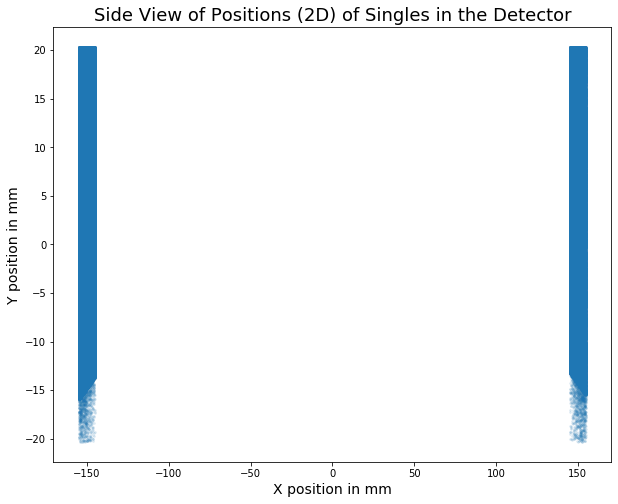

In [53]:
hits_x = singles.arrays()[b'globalPosX']
hits_y = singles.arrays()[b'globalPosY']
plt.figure(figsize=[10,8])
plt.scatter(hits_x, hits_y, alpha=0.1, s=3)
plt.title('Side View of Positions (2D) of Singles in the Detector', fontsize=18)
plt.xlabel('X position in mm', fontsize=14)
plt.ylabel('Y position in mm', fontsize=14)
plt.savefig('../Plots/sings_birdeye.png')

# DataFrame Example

In [58]:
dfA = pd.DataFrame(data=singA, columns=["X (mm)", "Y(mm)","Z(mm)","CrysID","Energy(KeV)","time (s)"])
dfB = pd.DataFrame(data=singB, columns=["X (mm)", "Y(mm)","Z(mm)","CrysID","Energy(KeV)","time (s)"])
#np.savetxt('dfAsing.txt', dfA.values)
#np.savetxt('dfBsing.txt', dfB.values)
sortDfA = dfA.sort_values(by=["CrysID"])
#sortDfB = dfB.sort_values(by=['CrysID'])
print(dfB)
print (dfA)

            X (mm)      Y(mm)      Z(mm)  CrysID  Energy(KeV)     time (s)
0       153.835037 -14.247636 -14.104476   270.0   546.413898     0.005081
1       150.585495  18.925953 -11.755695   438.0   584.263742     0.011820
2       149.407898  18.343864   2.801069  1141.0   178.903222     0.014243
3       153.660797 -14.997094 -11.333284   401.0   497.832686     0.036744
4       150.172165  14.776779 -12.935737   389.0   123.068832     0.072613
5       152.149719  15.217754   1.851332  1094.0   118.110217     0.077484
6       154.551849  -8.876451  -9.134280   540.0   355.412543     0.081163
7       146.940598  -4.612184   9.847123  1425.0   314.516306     0.105286
8       146.747681  -7.895257  -6.617237   629.0   573.544383     0.113168
9       145.535416  17.279867 -10.797405   480.0   308.735937     0.114941
10      154.872208   4.350483  12.649909  1566.0   486.286402     0.118942
11      151.908340 -14.537735   0.823173   974.0   471.989304     0.119942
12      151.924835 -14.45

# Read in Hit Data

In [54]:
hits = f[b'Hits']
print('Number of hits:', len(hits))
print('Hits: ')
for i in hits.keys():
    print(i, ' ', end='')

Number of hits: 0
Hits: 
b'PDGEncoding'  b'trackID'  b'parentID'  b'trackLocalTime'  b'time'  b'edep'  b'stepLength'  b'trackLength'  b'posX'  b'posY'  b'posZ'  b'localPosX'  b'localPosY'  b'localPosZ'  b'momDirX'  b'momDirY'  b'momDirZ'  b'gantryID'  b'blockID'  b'crystalID'  b'unused3ID'  b'unused4ID'  b'unused5ID'  b'photonID'  b'nPhantomCompton'  b'nCrystalCompton'  b'nPhantomRayleigh'  b'nCrystalRayleigh'  b'primaryID'  b'sourcePosX'  b'sourcePosY'  b'sourcePosZ'  b'sourceID'  b'eventID'  b'runID'  b'axialPos'  b'rotationAngle'  b'volumeID'  b'processName'  b'comptVolName'  b'RayleighVolName'  

# Read in Coincident Data

In [64]:
coinc = f[b'Coincidences']
print('Number of coincidences :', len(coinc))
print('coinc: ')
for i in coinc.keys():
    print(i, ' ', end='')

Number of coincidences : 0
coinc: 
b'runID'  b'axialPos'  b'rotationAngle'  b'eventID1'  b'sourceID1'  b'sourcePosX1'  b'sourcePosY1'  b'sourcePosZ1'  b'time1'  b'energy1'  b'globalPosX1'  b'globalPosY1'  b'globalPosZ1'  b'gantryID1'  b'blockID1'  b'crystalID1'  b'unused3ID1'  b'unused4ID1'  b'unused5ID1'  b'comptonPhantom1'  b'comptonCrystal1'  b'RayleighPhantom1'  b'RayleighCrystal1'  b'eventID2'  b'sourceID2'  b'sourcePosX2'  b'sourcePosY2'  b'sourcePosZ2'  b'time2'  b'energy2'  b'globalPosX2'  b'globalPosY2'  b'globalPosZ2'  b'gantryID2'  b'blockID2'  b'crystalID2'  b'unused3ID2'  b'unused4ID2'  b'unused5ID2'  b'comptonPhantom2'  b'comptonCrystal2'  b'RayleighPhantom2'  b'RayleighCrystal2'  b'sinogramTheta'  b'sinogramS'  b'comptVolName1'  b'comptVolName2'  b'RayleighVolName1'  b'RayleighVolName2'  

# LOR Graph

b'globalPosX1'


Text(0.5, 1.0, 'Lines of response (LOR)')

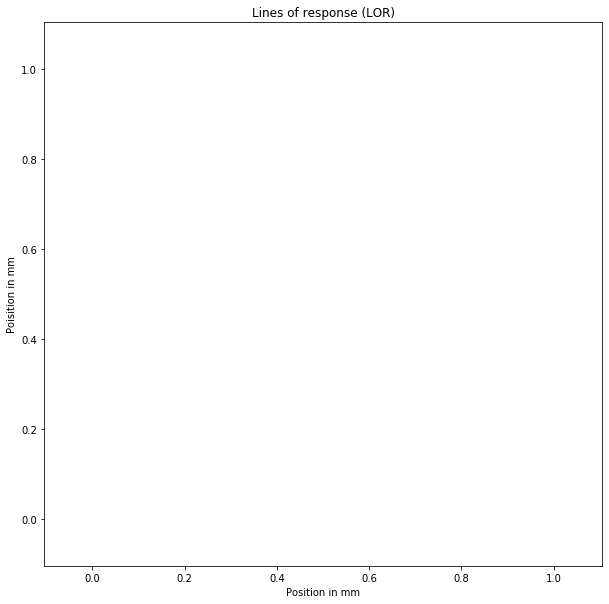

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

x1 = coinc.arrays()[b'globalPosX1']
y1 = coinc.arrays()[b'globalPosY1']
x2 = coinc.arrays()[b'globalPosX2']
y2 = coinc.arrays()[b'globalPosY2']

print(b'globalPosX1'[:100])
ax.plot([x1,x2],[y1,y2])

ax.autoscale()
ax.set_xlabel('Position in mm')
ax.set_ylabel('Poisition in mm')
ax.set_title('Lines of response (LOR)')